<a href="https://colab.research.google.com/github/monicasjsu/Machine_Learning/blob/main/Latent_Manifold_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent Manifold and Regression
**Team SheCodes**
1. Monica Dommaraju
2. Asha Balshiram Aher
3. Swati Ganesh Narkhede
4. Sri Sruthi Chilukuri

---

**1. Data story**

The dataset that we are working on consists of a subset of employee details such as Postion, Group, Salary, Satisfaction Level, Gender etc. and the class label to identify if the employee left the organization or still with the organization. This dataset consists of 1470 rows and 35 features. The ultimate goal of this project is to predict the employee attrition given the employee details. For this assignment we are going to analyze the few features and apply linear regression analysis to compare the pre and post performance results of features after applying latent manifold techniques. We will also be applying a few feature engineering techniques to derive insights.


**2. Dataset**

We found the following dataset from Kaggle postled by IBM HR Analytics department.

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

https://drive.google.com/open?id=1_DsgvxZcBkLEhy7rZVbOqLTbxt7S28hQHCTiPRc3eio


**2.a Data Selection**
 The Dataset that we have chosen don't have any missing values. So we tried to search for other related datasets that are related to employee attrition, but all the datasets that we found don't have any missing values. So, we have chosen the IBM dataset as we are interested in finding insights about the attrition rate of Technology heavy company such as IBM.


In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/HR_Employee_Attrition.csv",sep=',')
df.isnull().sum()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**3. Data Preparation/Engineering**
1. Lets head the data and look at the first few rows to get some understanding

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


2. Now lets check the percentiles and other statistics of each feature to understand the data distribution

In [ ]:
# Check the description of the dataset.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


3. Now lets check if there are any columns with singular values and remove them.

In [ ]:
# Check value_counts and remove any columns with singular values
single_cols = []
for col in df.columns:
    if len(df[col].unique())==1:
        print(col)
        single_cols.append(col)
# Now lets drop the columns
df.drop(single_cols, axis=1, inplace=True)

EmployeeCount
Over18
StandardHours




```
# This is formatted as code
```

4. Check the types of dataset and convert them to the types which can be feeded to the Machine Learning models later.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

5. Change the Object type to categorical types, so that they can be converted to Integer using cat.codes

In [ ]:
for col in ['BusinessTravel', 'Gender', 'JobRole', 'OverTime', 'EducationField', 'Department', 'MaritalStatus', 'Attrition']:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int8
BusinessTravel              1470 non-null int8
DailyRate                   1470 non-null int64
Department                  1470 non-null int8
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int8
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int8
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int8
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int8
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non

5. a) As we can see, all the columns are now converted to int.
6. Now lets check the correlation matrix to find the most important features.

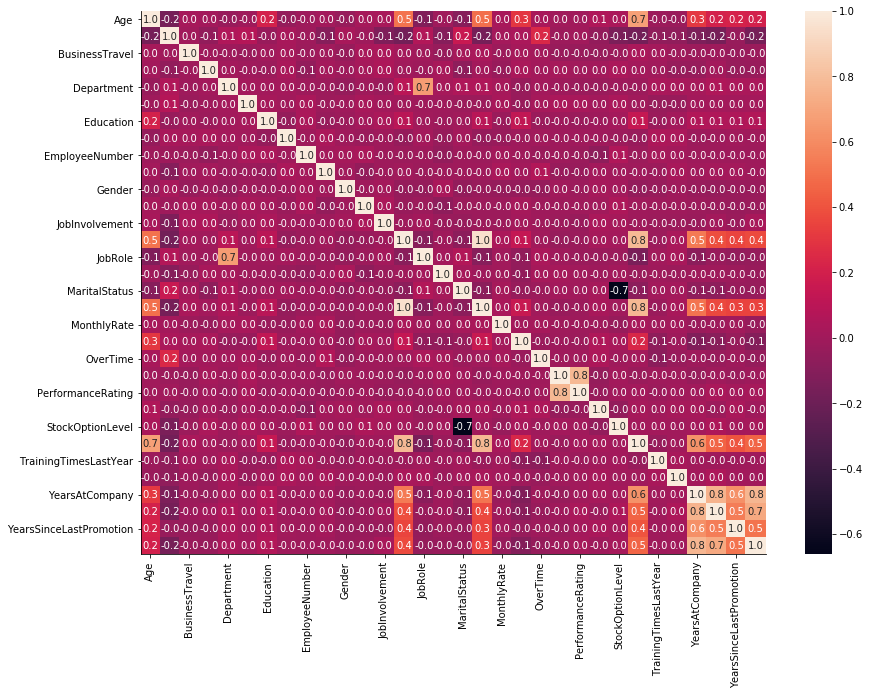

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# correlation plot to know which attributes show highest correlation
corr = df.corr()
g = sns.heatmap(corr, annot=True, fmt='.1f')
sns.despine()
g.figure.set_size_inches(14, 10)
plt.show()

6. a) We can see that **TotalWorking** and **MonthlyIncome** are have highest correlation and also looks important. Similarly **Age** and **TotalWorkingYears** are highly correlated
So lets work on these two features for linear aggression analysis.

**4. Linear Regression**

Mean Squared Error:41.185411203748195


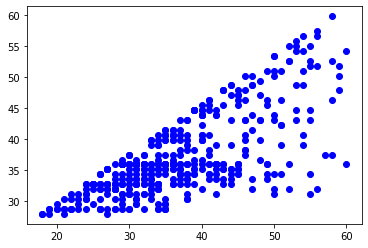

Mean Squared Error:0.8561973948440242


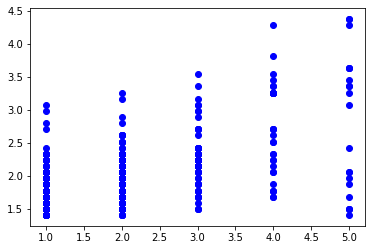

Mean Squared Error:5.676378179719022


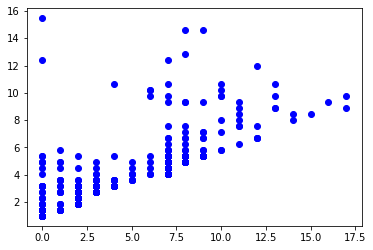

Mean Squared Error:0.2903781668814507


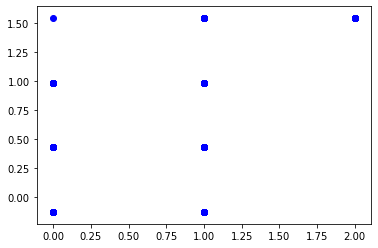

Mean Squared Error:6.100712272427294


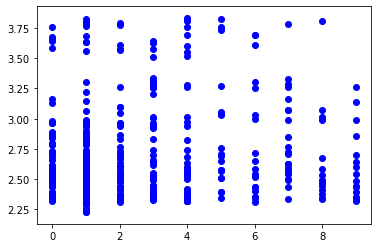

Mean Squared Error:0.13002688075673696


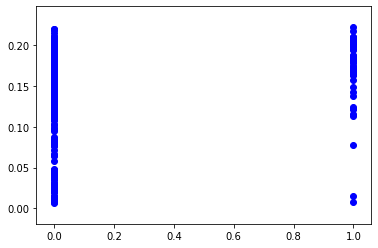

Mean Squared Error:0.13398589609811234


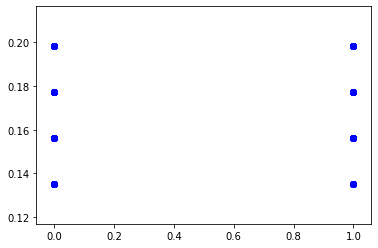

Mean Squared Error:0.13277105746042817


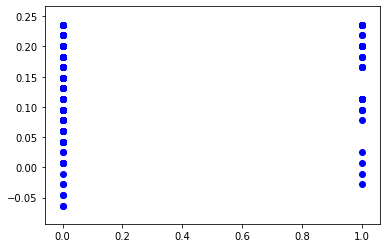

In [ ]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error

def linear_reg(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, stratify=y)
  X_train= X_train.values.reshape(-1, 1)
  X_test = X_test.values.reshape(-1, 1)


  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  y_pred = lin_reg.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  
  print ("Mean Squared Error:" + str(mse))
  plt.scatter(y_test, y_pred, color = 'blue')
  plt.show()

# Method to find missing/latent data by finding the highly correlated features
# and then performing linear regression to predict the missing values.
# In our scenario, as we don't have missing values, we have assumed that
# our test dataset are the ones with missing data.
linear_reg(df['TotalWorkingYears'], df['Age'])
linear_reg(df['YearsAtCompany'], df['JobLevel'])
linear_reg(df['YearsAtCompany'], df['YearsWithCurrManager'])
linear_reg(df['StockOptionLevel'], df['MaritalStatus'])
linear_reg(df['MonthlyIncome'], df['NumCompaniesWorked'])
linear_reg(df['MonthlyIncome'], df['Attrition'])
linear_reg(df['WorkLifeBalance'], df['Attrition'])
linear_reg(df['YearsInCurrentRole'], df['Attrition'])
# As we can see, the first prediction has a lot RMSE. So lets try to use 
# latent manifold to add more features 


**5. Date Enrichment**

Every sample in our dataset each row is specific to a customer. Fetching other features about the same customer was not possible. So we planned to enrich our data by extracting more features by doing clustering and grouping employees based on similarity, which moght implicitly help the model do predictions accurately.

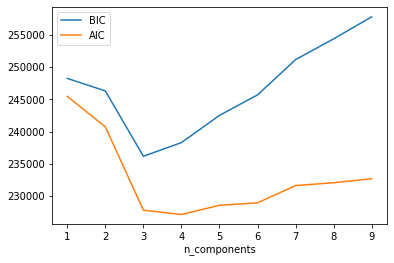

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

y = df['Attrition']
X = df.drop(['Attrition'], axis=1)
# AIC and BIC to calculate the best n_components
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

AIC and BIC scores are low when n_components is 3, which makes 3 as the ideal number of clusters

In [ ]:
import collections
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type = 'full', random_state=0)
y_gmm = gmm.fit_predict(X)
df['cluster'] = y_gmm
collections.Counter(y_gmm)

Counter({0: 1140, 1: 182, 2: 148})

**6. Finding Latent Manifold Features**

This can be done by computing the information content for each feature. This means to pick the features with the highest entropy.


In [ ]:
from collections import Counter
from scipy import stats

for col in X.columns:
    entropy = stats.entropy(df[col].values, base=2)
    print(str(col) +":" + str(entropy))


Age:10.47787214079368
BusinessTravel:10.323627781938299
DailyRate:10.320576166905383
Department:10.3742656225842
DistanceFromHome:9.983798134117906
Education:10.423466933255554
EducationField:10.263623775405673
EmployeeNumber:10.23364738941297
EnvironmentSatisfaction:10.392547303128143
Gender:9.78463484555752
HourlyRate:10.45056591346542
JobInvolvement:10.468037742828866
JobLevel:10.329816620013753
JobRole:10.23400249697295
JobSatisfaction:10.390673631528482
MaritalStatus:10.072765689057688
MonthlyIncome:10.194925453708958
MonthlyRate:10.326962831410512
NumCompaniesWorked:9.907259462073736
OverTime:8.700439718141094
PercentSalaryHike:10.481710159304283
PerformanceRating:10.512771828424214
RelationshipSatisfaction:10.394874355135771
StockOptionLevel:9.57148050150521
TotalWorkingYears:10.194366256785253
TrainingTimesLastYear:10.353619034798296
WorkLifeBalance:10.469757962112826
YearsAtCompany:10.03979996338687
YearsInCurrentRole:9.95518698762917
YearsSinceLastPromotion:9.241866119618846


From the above calculation, we found out that the information content is not concentrated on a few features and it is almost evenly distributed. However, we will pick the features from which the latent variable can be derived. 

We picked all the features related to **satisfaction** and **JobInvolvement, PerformanceRating** we are going to predict a new latent variables in the next section.


**7. Using manifold to predict new features**

We gave weights to different satisfaction related features based on practical
intution to find a new features named **Overall_Satisfaction** and **Performace_Involvement** 

50% weight to JobSatisfaction, 30% to EnvironmentSatisfaction and 20% to RelationshipSatisfaction.

Performace_Involvement can be calculated by doing PerformanceRating * JobInvolvement


In [ ]:
# Linear regression on original data

y = df['Attrition']
X = df.drop('Attrition', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, stratify=y)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print ("Mean Squared Error:" + str(mse))


Mean Squared Error:0.11206351077308029


In [ ]:
df['Overall_Satisfaction'] = (df['JobSatisfaction'] * 0.7) + (df['EnvironmentSatisfaction'] * 0.2)+ (df['RelationshipSatisfaction'] * 0.1)
df['Performance_Involvement'] = df['JobInvolvement'] * df['PerformanceRating']

**7.a) Linear Regression after Latent Manifold**

Now lets run the linear regression model before and after the Latent manifold to compare the performance improvement

In [ ]:
y = df['Attrition']
X = df.drop(['Attrition'], axis=1)

# Linear regression on Enriched data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, stratify=y)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print ("Mean Squared Error:" + str(mse))


Mean Squared Error:0.11205924514111813


**Analysis**

1. We have compared the linear regression and found that the latent feature that we have added didn't have much effect on improving the performance. Our future work will try to focus more on combining more possible  features and if possible search for more datasets that has a few common shared features, so that we can enhance our dataset

---

2. However, the newly generated features gave us the flexibility to reduce the dimensions and also helped us to analyze the attrition rate and other data more intutively.